In [1]:
from sklearn import datasets
import numpy as np
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.decomposition import PCA
import seaborn as sns

from generator import CategoricalClassification

In [2]:
#Loading Scipy Iris dataset
iris = datasets.load_iris()
irisX = iris.data
irisY = iris.target

irisT = np.transpose(irisX)

#Iris feature set values & their respective probabilities
unique_val = []
val_prob = []
for feature in irisT:
    unique, count = np.unique(feature, return_counts=True)
    unique_val.append(unique)
    val_prob.append(count/150)

print(irisX.shape)

(150, 4)


In [25]:
cc = CategoricalClassification()

dataset_structure = [
        (0, [unique_val[0], val_prob[0]]), 
        (1, [unique_val[1], val_prob[1]]), 
        (2, [unique_val[2], val_prob[2]]),
        (3, [unique_val[3], val_prob[3]])
    ] 

X = cc.generate_data(4, 1500, structure=dataset_structure, ensure_rep=True, seed=42)
y = cc.generate_labels(X, n=3, class_relation='linear', balance=False)

values, counts = np.unique(y, return_counts=True)
print(len(y), values, counts)
print(X.shape)

1500 [0 1 2] [507 505 488]
(1500, 4)


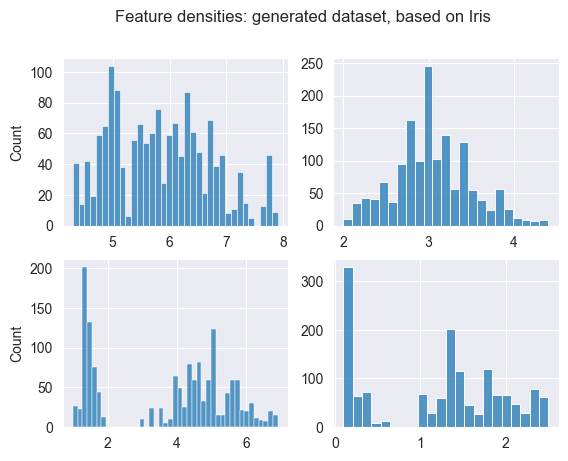

In [26]:
Xt = X.T
fig, axes = plt.subplots(2,2)
sns.histplot(Xt[0], bins=len(np.unique(Xt[0])), ax=axes[0][0])
sns.histplot(Xt[1], bins=len(np.unique(Xt[1])), ax=axes[0][1]).set(ylabel=None)
sns.histplot(Xt[2], bins=len(np.unique(Xt[2])), ax=axes[1][0])
sns.histplot(Xt[3], bins=len(np.unique(Xt[3])), ax=axes[1][1]).set(ylabel=None)

fig.suptitle("Feature densities: generated dataset, based on Iris")
plt.show()

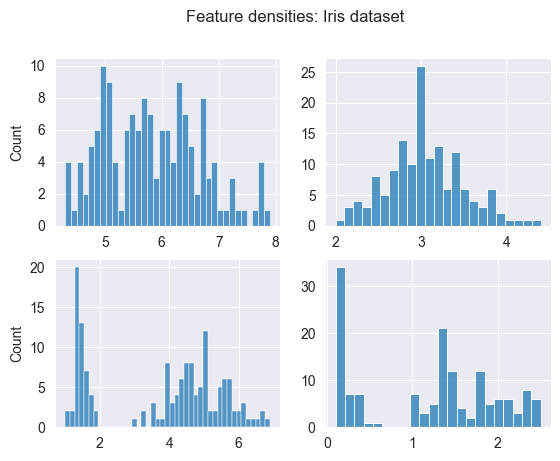

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2)

sns.histplot(irisT[0], bins=len(np.unique(irisT[0])), ax=axes[0][0])
sns.histplot(irisT[1], bins=len(np.unique(irisT[1])), ax=axes[0][1]).set(ylabel=None)
sns.histplot(irisT[2], bins=len(np.unique(irisT[2])), ax=axes[1][0])
sns.histplot(irisT[3], bins=len(np.unique(irisT[3])), ax=axes[1][1]).set(ylabel=None)


plt.suptitle("Feature densities: Iris dataset")
plt.show()

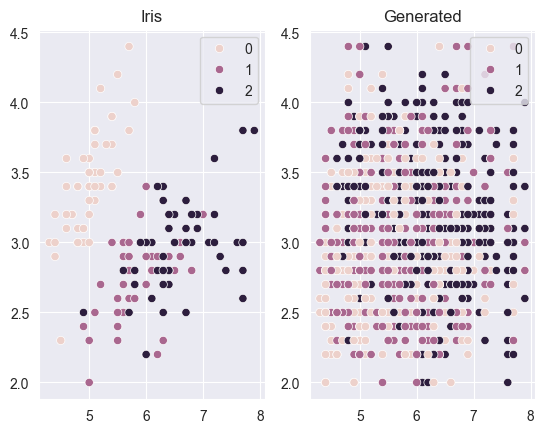

In [27]:
fig, axes = plt.subplots(1, 2)

sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=iris.target, ax=axes[0])
axes[0].set_title("Iris")

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axes[1])
axes[1].set_title("Generated")

plt.show()

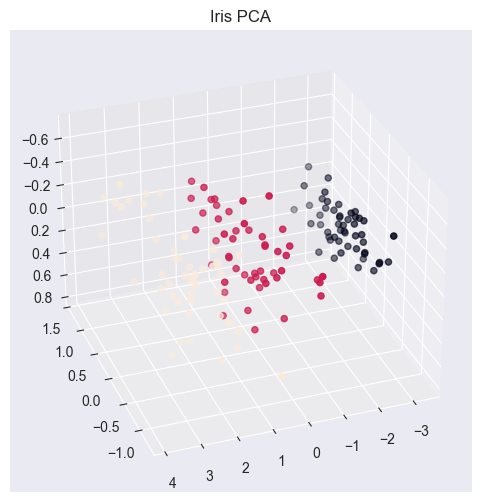

In [28]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=20,
)
ax.set_title("Iris PCA")
plt.show()

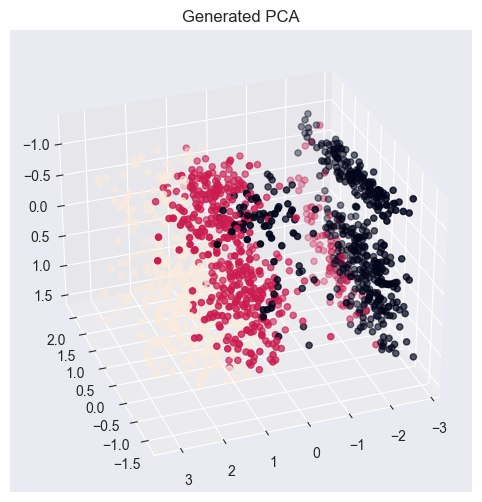

In [29]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    s=20,
)
ax.set_title("Generated PCA")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [31]:
iX_train, iX_test, iy_train, iy_test = train_test_split(irisX, irisY, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Iris Classification Report:")
iRFC = RandomForestClassifier()
iRFC.fit(iX_train, iy_train)
iy_pred = iRFC.predict(iX_test)
print(classification_report(iy_test, iy_pred))

print("Generated Classification Report:")
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

Iris Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Generated Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       103
           1       0.90      0.92      0.91        98
           2       0.98      0.96      0.97        99

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Adding correlated features and combinations

In [11]:
from scipy.stats import pearsonr

In [12]:
#Adding three additional features, correlated to feature at ix 1 with correlation coef. 0.8, ix 3 with correlation coef. 0.8,
# and ix 0 with correlation coef. 0.2. Correlated features will therefore be in columns with ix 4, 5, 6

X = cc.generate_correlated(X, [1,3], r=0.8)
X = cc.generate_correlated(X, [0], r=0.2)
print(cc.dataset_info)

                Number of original features: 4, at columns [0, ..., 3]
                Number of samples: 150
                Cardinality: [5, (0, [array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]), array([0.00666667, 0.02      , 0.00666667, 0.02666667, 0.01333333,
       0.03333333, 0.04      , 0.06666667, 0.06      , 0.02666667,
       0.00666667, 0.04      , 0.04666667, 0.04      , 0.05333333,
       0.04666667, 0.02      , 0.04      , 0.04      , 0.02666667,
       0.06      , 0.04666667, 0.03333333, 0.01333333, 0.05333333,
       0.02      , 0.02666667, 0.00666667, 0.00666667, 0.02      ,
       0.00666667, 0.00666667, 0.00666667, 0.02666667, 0.00666667])]), (1, [array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.4]), array([0.00666667, 0.02      , 0.02666667, 0.

In [13]:
Xt = X.T
corr, _ = pearsonr(Xt[1], Xt[4])
print("Pearson correlation, feature 1 and 4:", corr)
corr, _ = pearsonr(Xt[3], Xt[5])
print("Pearson correlation, feature 3 and 5:", corr)
corr, _ = pearsonr(Xt[0], Xt[6])
print("Pearson correlation, feature 0 and 6:", corr)

Pearson correlation, feature 1 and 4: 0.8000000000000003
Pearson correlation, feature 3 and 5: 0.8
Pearson correlation, feature 0 and 6: 0.19999999999999987


In [14]:
# Adding one linear and one nonlinear feature combination. Two new features will be generated, at column ix 7, 8.

X = cc.generate_combinations(X, [0,1]) #linear
X = cc.generate_combinations(X, [0,3,6], combination_type='nonlinear') #nonlinear
print(X.shape)
print(cc.dataset_info)

(150, 9)
                Number of original features: 4, at columns [0, ..., 3]
                Number of samples: 150
                Cardinality: [5, (0, [array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]), array([0.00666667, 0.02      , 0.00666667, 0.02666667, 0.01333333,
       0.03333333, 0.04      , 0.06666667, 0.06      , 0.02666667,
       0.00666667, 0.04      , 0.04666667, 0.04      , 0.05333333,
       0.04666667, 0.02      , 0.04      , 0.04      , 0.02666667,
       0.06      , 0.04666667, 0.03333333, 0.01333333, 0.05333333,
       0.02      , 0.02666667, 0.00666667, 0.00666667, 0.02      ,
       0.00666667, 0.00666667, 0.00666667, 0.02666667, 0.00666667])]), (1, [array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.4]), array([0.00666667, 0.02      , 0.026